# Linear Regression : 

Linear Regressoin is the most basic and popular algorithm of machine learning. It is supervised machine learning algorithm which is predicted output is real values/continuous. Or, Relationship between input/independent variables and single output/dependent variable. 
We will get linear regression image look like : -

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png)

> ## Objective : 

To make a simple linear regression model operating on one variable from scratch using statistical formulas

### Simple Linear Regression
A linear line relationship between one input/independent variable(X) and one output/dependent variable(y).

     y = mX + b
Where, y is dependent/target variable; X is input/independent variable; m is slop of regression line; b is y-intercept.

> ## Approach : 

The model is built in the following steps 

- **Data Wrangling**
- **Data Cleaning : Missing Values** 
- **Visualisation : UniVariate** 
    
      - Histograms
      - Scatter Plot 
      - Boxplot
      
- **Parameter Functions :**
      
      - Mean and Variance
      - Co-Variance
      - Coefficients
      - Splitting Test Data
      
- **Model Building and Predictions**

- **RMSE Function building and calculation**

- **Conclusion**
      - 

## `1.` Data Wrangling

In [1]:
#load all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import math
%matplotlib inline

In [2]:
#load data for train and test
train = pd.read_csv(r'train (2).csv')
test = pd.read_csv(r'test.csv')

**TASK : Print the head of train and test data** 

In [3]:
### START CODE (~2 lines of code)
print(train.head())

print(test.head())


print(train.describe())

# print(test.head())
### END CODE

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


**TASK : Get the shapes of training and testing data**

In [4]:
### START CODE HERE (~ 2 Lines of code)
print(train.shape)

print(test.shape)

### END CODE 

(700, 2)
(300, 2)


## `2.` Data Cleaning 

**TASK : Get info about dataset using `info()` method**

In [5]:
### START CODE HERE (~1 Line of code)
train.info()
### END CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


- **Missing values**

**TASK : Find the numbe of missing values**

In [7]:
### START CODE HERE (~ 2 lines of code)
# print(train.isnull().sum())
# print(test.isnull().sum())
count = train.count()
nmiss_train = len(train)-count
print(nmiss_train)
### END CODE

x    0
y    1
dtype: int64


**TASK : Remove instances with missing values**

In [8]:
### START CODE HERE (~2 Lines of code)
train = pd.read_csv(r"train (2).csv")
train.dropna(how="any", axis = 0, inplace = True)
print(train.isnull().sum())
print(train.shape)

### END CODE

x    0
y    0
dtype: int64
(699, 2)


**TASK : Describe the dataset**

In [9]:
### START CODE HERE (~ 1 Line of code)
train.describe()
### END CODE

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


## `3.` Visualization of train dataset

### `3.1` Histograms

**TASK : Plot a `histogram` of train dataset** 

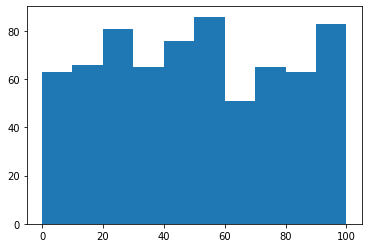

In [10]:
### START CODE HERE (~2 Lines of code)
plt.hist(train['x'])
# plt.hist(train['y'])
plt.show()

### END CODE

### `3.2` Scatter Plot

**TASK : Plot a `scatter plot` between dependent and independent variable**

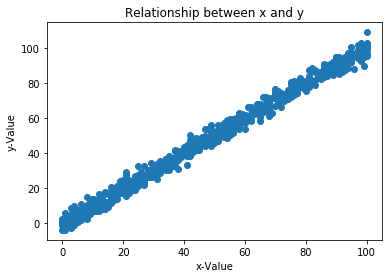

In [11]:
### START CODE HERE (FULL CODE)
## Show Xlabel , Ylabel and Title also
plt.scatter(train['x'], train['y'])
plt.xlabel("x-Value")
plt.ylabel("y-Value")
plt.title("Relationship between x and y")
plt.show()

### END CODE

Conclusion:
    Since the y value is increasing linearly for a unit increase in x, Hence linear regression hold good

**Analyse if linear regression would be a good fit on this problem** 

### `3.3` Boxplots 

**TASK : Make a `boxplot` of training data**

A better understanding of boxplot would be given by the below image

<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090">

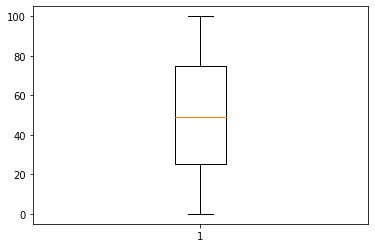

In [12]:
### START CODE HERE (~ 2 Lines of code)
plt.boxplot(train['x'])
plt.show()

### END CODE

**TASK : Split the `dependent` and `independent` variable and name them `y` and `X` respectively**

In [13]:
### START CODE HERE (~ 2 Lines of code)
x = train['x']
y = train['y']
### END CODE

## `4.` Parameter Functions

 Let's find the slop of regression line(m) and bais(y-intercept). you can find these using diffrente approaches. Like:- Ordinary Least Square approach and Gradient Descent approach.
 
- **Ordinary Least Square**
 As you know that the relationship between independent(X) variable and dependent(y) variable is know as linear regression.
 
 **Orinary Least Sqaure** - the sum of the squares of the differences between an observation’s actual and estimated values.
![Regression image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/Least-Square-Method-2-399x300.png) 
Total error of this model is the sum of all errors of each point. ie.

$$SE=\sum_{i=1}^nDi^2$$

    Di = Distance between line and ith point.
    n = Total number of points
### Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### `4.1`   Mean and Variance 
Mean of numbers can be calculated as: -

    mean(x) = sum(x) / count(x)

**TASK : Make `functions` for mean and variance**

In [14]:
### START CODE HERE (Write the code where '#' is given) 
import math
#Calculate mean of list numbers with mean function
def new_mean1(x):
    count=len(x)
    sum_of_total = 0
    for val in x:
        sum_of_total = sum_of_total + val
    
    result = sum_of_total/count
    return result

# can also be implemented as shown below
def new_mean2(x):
    x = pd.Series(x)
    res = x.mean()
    return res
    
#Calculate varience of list numbers with variance function
def new_var1(x):
    count = len(x)-1
    m = new_mean1(x)
    variance_total = 0
    for val in x:
        var1 = ((val-m)**2)/count
        variance_total = variance_total+var1
        
    return variance_total

# can also be implemented as shown below
def new_var2(x):
    x = pd.Series(x)
    res = x.var()
    return res

### END CODE

**TASK : Find the mean and variance of X and y and store it in `X_mean` , `y_mean` , `X_variance` , `y_variance`**

In [15]:
### START CODE HERE
# X_mean = new_mean1(x)
X_mean = new_mean2(x)
print(X_mean)
# y_mean = new_mean1(y)
y_mean = new_mean2(y)
print(y_mean)


# Variance
# X_variance = new_var1(x)
X_variance = new_var2(x)
print(X_variance)

# y_variance = new_var1(y)
y_variance = new_var2(y)
print(y_variance)

### END CODE

50.01430615164521
49.93986917045776
838.3665572184576
847.3465201976298


### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
you can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


**TASK : Create function to implement `co-variance`**

In [16]:
### START CODE HERE (Write code where '#' is given)

#Calculate the covariance of these groups
def new_covariance(x, y):
    count = len(x)-1
    l = x - x.mean()
    y = y - y.mean()
    return (l*y).sum()/count

### END CODE

In [17]:
train.cov()

,x,y
x,838.366557,838.916846
y,838.916846,847.346520


In [18]:
new_covariance(x, y) 

838.9168458155477

### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance()
    b = mean(y) - (m*mean(X))

**TASK : Make a function `coefficients()` which returns m,b**

In [19]:
### START CODE HERE (Write code where '#' is given) 

#Lets estimate with coefficient
def coefficient(x,y):
    covariance = new_covariance(x,y)
    var = new_var1(x)
    m = covariance/var
    
    y_mean = new_mean1(y)
    x_mean = new_mean1(x)
    b = y_mean - (m*(x_mean))
    
    return ({"slope":m, "intercept":b})
    

### END CODE

In [20]:
coefficient(x,y)

{'slope': 1.0006563818563046, 'intercept': -0.10726546430105088}

In [21]:
y_train =  -0.10726546430105088 +  1.0006563818563046*x

### Compraing with sklearn package and checking weather getting the same results or not

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

In [23]:
p = np.array(train['x']).reshape(-1,1)
q = np.array(train['y']).reshape(-1,1)

In [24]:
model.fit(p, q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.intercept_

array([-0.10726546])

In [26]:
model.coef_

array([[1.00065638]])

In [27]:
pred = model.predict(p)

In [28]:
mean_squared_error(q, pred)

7.867752733487686

Conclusion: compared with inbuilt and own built function getting the same value 

you have estimated the coefficients. Now, you can use them to make predictions follows by this eqation: -

       y = mX + b
 

### `4.4` Splitting Test Data 

**TASK : Separate the `Test` dataset into X_test and y_test while reshaping it to (-1,1)**

In [29]:
### START CODE HERE (Write code where '#' is given)

# similarly write code for y_test
test.head()
X_test = np.array(test["x"]).reshape(-1,1)
y_test = np.array(test["y"]).reshape(-1,1)

### END CODE

## `5.` Linear Regression Model and Predictions

**TASK : Make a function to evaluate `linear_regression` with above calculated parameters**

Use the formula Y= mX + c

In [30]:
### START CODE HERE (Write code where '#' is given)

#simple_linear_regression() function making here to prediction
def simple_linear_regression(x):
    c = -0.10726546430105088
    m = 1.0006563818563046
    yPred = c + m*(x)
    return yPred

### END CODE

**TASK : Make a line plot of the predictions and a scatter plot of the dataset**

In [31]:
predict_test = simple_linear_regression(X_test)

In [32]:
type(predict_test)
type(y_test)

numpy.ndarray

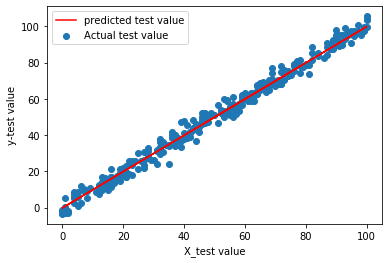

In [33]:
### START CODE HERE (FULL CODE)

# Ploting Line

plt.scatter(X_test, y_test, label= "Actual test value")
plt.plot(X_test, predict_test, c='red', label = "predicted test value")
plt.xlabel("X_test value")
plt.ylabel("y-test value")
plt.legend()
plt.show()

# Ploting Scatter Points

### END CODE

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)

Here yhat is the ith predicted output values or simply yhat = mX + c


**TASK : Make `Root_mean_square_error` function**

In [34]:
### START CODE HERE (Write code where '#' is given) 
def root_mean_square_error(actual, predicted):
    count = actual.size
    actual_value = actual.sum()
    predicted_value = predicted.sum()
    result = np.sqrt((actual_value-predicted_value)**2)/np.sqrt(count)
    return result

### END CODE 

**TASK : Calculate RMSE using made function**

In [35]:
### START CODE HERE 
root_mean_square_error(y_test, predict_test)
### END CODE 

5.927354854631916

## Conclusion

Conclusion : There is 6% variation in modelpredicted vs actual y values and also from the plot, it can be seen that
    model estimated almost accurate prediction hence this model holds good